In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Загрузка данных
data_path = '/Users/pk/Desktop/Jupyter/хакатон 2.0/history/SBER/1d/2023-07-13-2024-07-13.csv'
data = pd.read_csv(data_path, parse_dates=['begin'], index_col='begin')

df = pd.read_csv(data_path, sep=",", encoding="utf-8")
df

,open,close,high,low,value,volume,begin,end
0,247.97,246.19,248.15,245.34,7.288359e+09,29561460.0,2023-07-13,2023-07-13 23:59:59
1,246.32,246.45,247.05,244.51,6.311038e+09,25661560.0,2023-07-14,2023-07-14 23:59:59
2,244.77,245.39,246.20,243.60,8.878816e+09,36193390.0,2023-07-17,2023-07-17 23:59:59
3,245.80,246.77,247.50,245.26,8.881118e+09,36008340.0,2023-07-18,2023-07-18 23:59:59
4,247.25,245.85,248.10,245.00,7.752931e+09,31451760.0,2023-07-19,2023-07-19 23:59:59
...,...,...,...,...,...,...,...,...
251,325.76,324.07,327.44,323.74,9.025371e+09,27756900.0,2024-07-08,2024-07-08 23:59:59
252,324.30,319.99,325.33,317.50,1.743661e+10,54199810.0,2024-07-09,2024-07-09 23:59:59
253,319.00,316.68,320.30,314.30,2.806553e+10,88512550.0,2024-07-10,2024-07-10 23:59:59
254,289.96,295.87,296.98,285.22,4.873832e+10,168030600.0,2024-07-11,2024-07-11 23:59:59


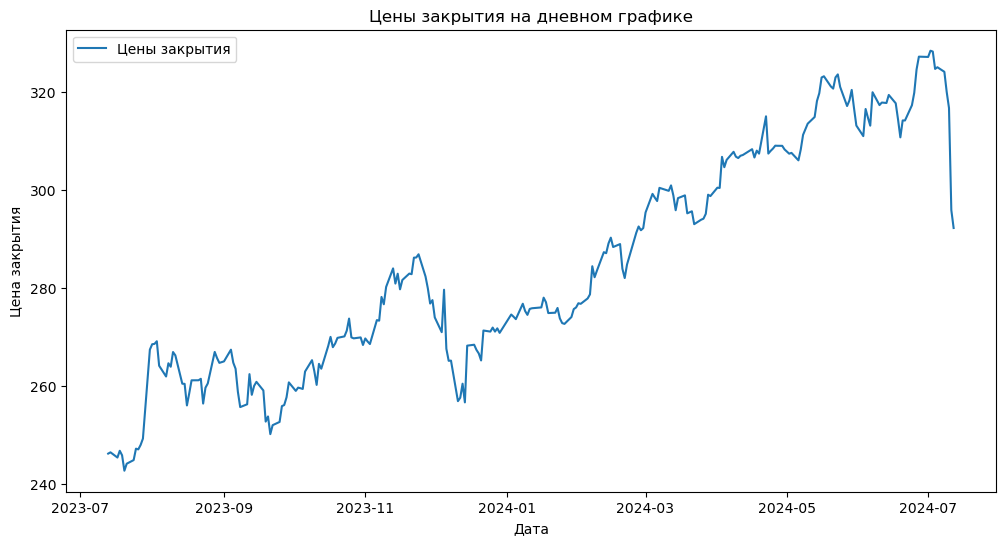

In [2]:
# Выбираем столбец с ценами закрытия
close_prices = data['close']

# Визуализация данных
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Цены закрытия')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.title('Цены закрытия на дневном графике')
plt.legend()
plt.show()

ADF Statistic: -1.7144284156672354
p-value: 0.4236942742926954


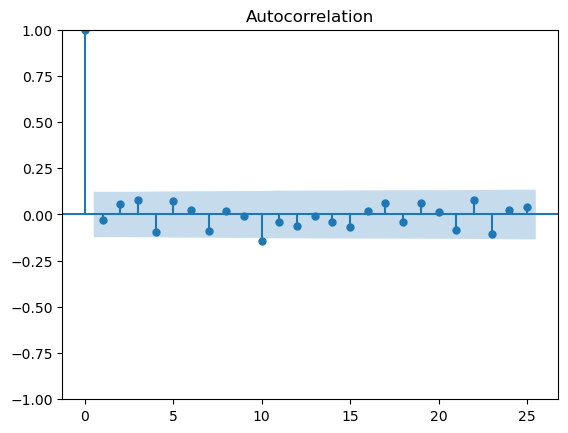

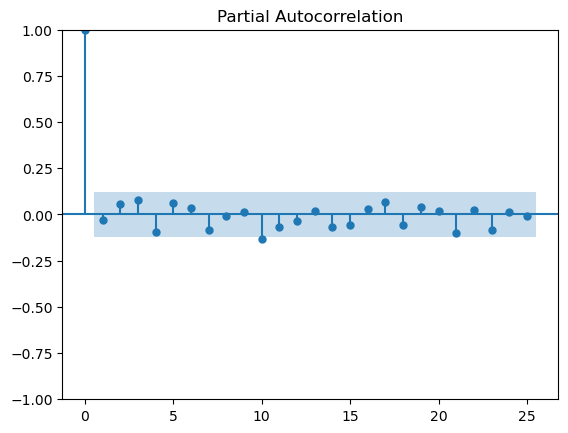

In [3]:
# Проверка стационарности временного ряда
result = adfuller(close_prices)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Если временной ряд не стационарный (p-value > 0.05), применяем дифференцирование
if result[1] > 0.05:
    close_prices_diff = close_prices.diff().dropna()
else:
    close_prices_diff = close_prices

# Определение параметров (p, d, q) с помощью ACF и PACF
plot_acf(close_prices_diff)
plot_pacf(close_prices_diff)
plt.show()


In [7]:

# Определение параметров модели ARIMA
p, d, q = 1, 1, 1  

# Обучение модели ARIMA
model = ARIMA(close_prices, order=(p, d, q))
model_fit = model.fit()

# Оценка модели
print(model_fit.summary())

/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  256
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -665.865
Date:                Tue, 16 Jul 2024   AIC                           1337.731
Time:                        20:58:20   BIC                           1348.355
Sample:                             0   HQIC                          1342.004
                                - 256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9447      0.235      4.024      0.000       0.485       1.405
ma.L1         -0.9531      0.221     -4.319      0.000      -1.386      -0.521
sigma2        10.8544      0.432     25.101      0.0

/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/pk/miniconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


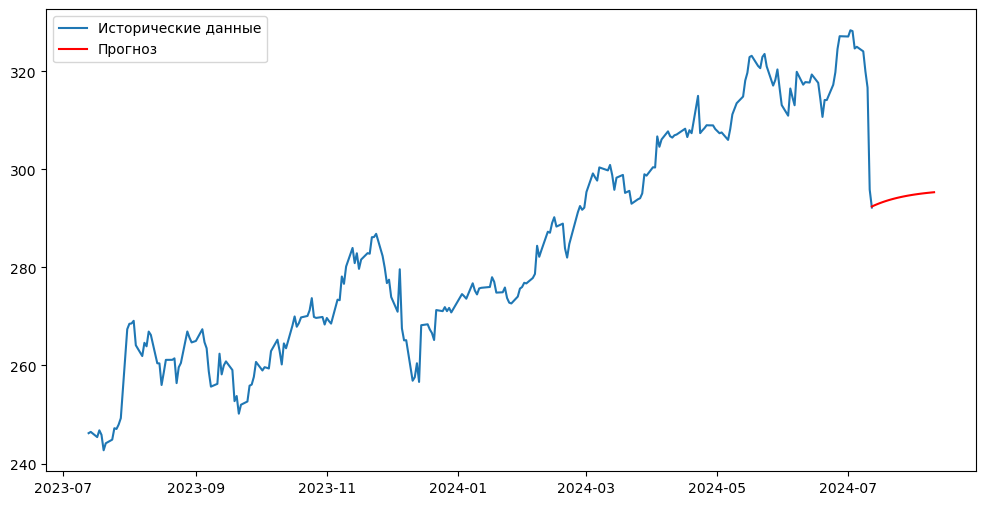

In [8]:
# Прогнозирование на 30 дней вперед
forecast = model_fit.forecast(steps=30)
forecast_dates = pd.date_range(start=close_prices.index[-1], periods=30, freq='D')

# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(close_prices, label='Исторические данные')
plt.plot(forecast_dates, forecast, label='Прогноз', color='red')
plt.legend()
plt.show()